# Timeseries correlation

One of ways of comparing timeseries between themselves, can be explored with help of timeseries to graph conversion techniques:

## Comparing whole segment

Firstly we can convert timeseries into a single node, and connect different nodes, each representing their own series, with edge weight being equal to the correlation between two timeseries. Here we will demonstrate using Person correlation technique.

In [16]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingSlidingWindow, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph
from tsg_io.input import CsvFile
from to_graph.strategy_to_graph import BuildTimeseriesToGraphPearsonCorrelation, BuildTimeseriesToGraphNaturalVisibilityStrategy
from to_graph.strategy_linking_multi_graphs import LinkGraphs, PearsonCorrelation
import warnings
warnings.filterwarnings('ignore')

amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")

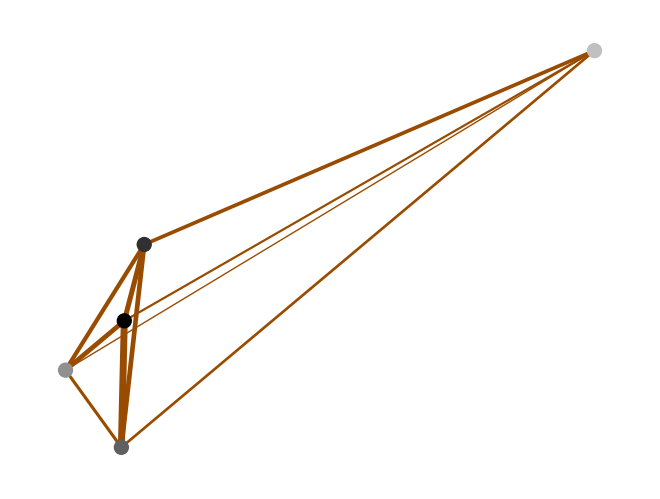

In [17]:
timegraph_pearson_correlation = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingSegmentation(120, 150)))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingSegmentation(180, 210)))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingSegmentation(240, 270)))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingSegmentation(300, 330)))\
    .to_graph(BuildTimeseriesToGraphPearsonCorrelation().get_strategy())\
    .link(LinkGraphs().correlation(PearsonCorrelation()))\
    .draw()

## Comparing segments using sliding window mechanism

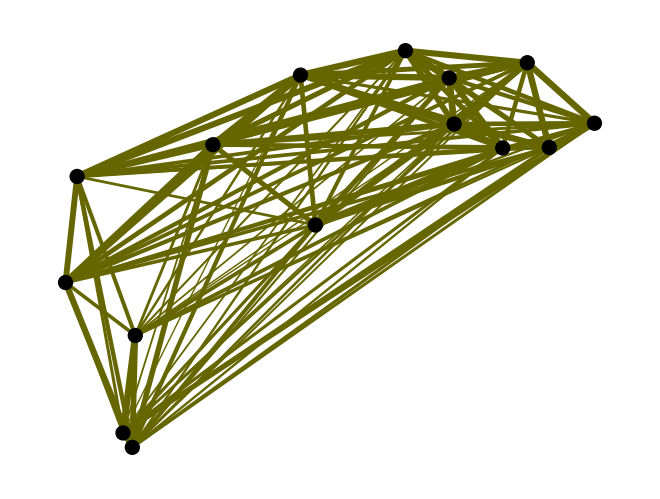

In [18]:
timegraph_pearson_correlation_sliding_window = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingComposite()\
        .add(TimeseriesPreprocessingSegmentation(60, 80))\
        .add(TimeseriesPreprocessingSlidingWindow(5)))\
    .to_graph(BuildTimeseriesToGraphPearsonCorrelation().get_strategy())\
    .link(LinkGraphs().correlation_sliding_window(PearsonCorrelation()))\
    .draw()

we can use same mechanism on multiple different timeseries and compare equally positioned windows of data:

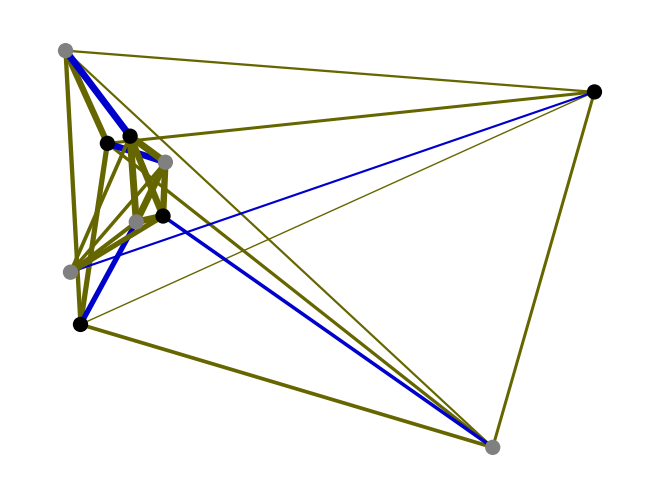

In [19]:
timegraph_pearson_correlation_sliding_window = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingComposite()\
        .add(TimeseriesPreprocessingSegmentation(60, 70))\
        .add(TimeseriesPreprocessingSlidingWindow(5)))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingComposite()\
            .add(TimeseriesPreprocessingSegmentation(120, 130))\
            .add(TimeseriesPreprocessingSlidingWindow(5))))\
    .to_graph(BuildTimeseriesToGraphPearsonCorrelation().get_strategy())\
    .link(LinkGraphs().correlation_sliding_window(PearsonCorrelation()).positional_correlation_sliding_window(PearsonCorrelation()))\
    .draw()

## Connecting multivariate visibility graph based on dynamic time warping

We also provide method that, connects multiple visibility graphs into one multivariate one based on dynamic time warping. Speciality of this method is, that you do not need to provide graphs / timeseries of the same length for it to work.

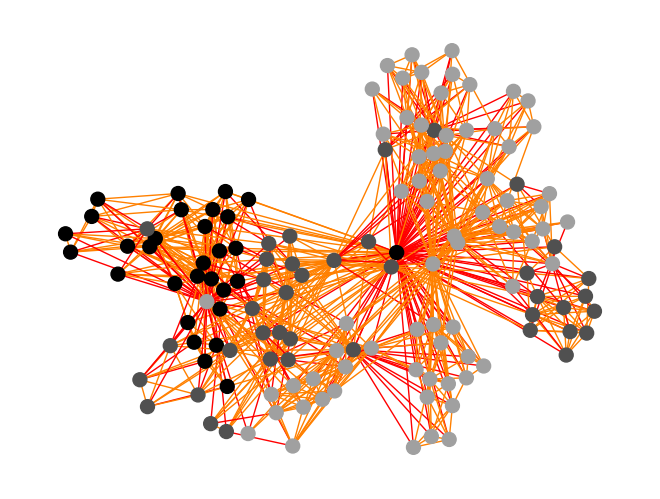

In [20]:
timegraph_dtw = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingSegmentation(90, 130)))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
        .with_preprocessing(TimeseriesPreprocessingSegmentation(130, 200)))\
    .to_graph(BuildTimeseriesToGraphNaturalVisibilityStrategy().with_limit(1).get_strategy())\
    .link(LinkGraphs().dynamic_timewarping())\
    .draw()